In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

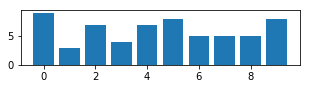

In [5]:
# 막대그래프(X,Y)
plt.figure(figsize=(5,1))
plt.bar(np.arange(10),np.random.randint(1,10,size=10))

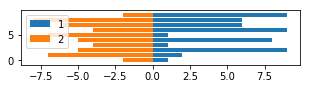

In [16]:
plt.figure(figsize=(5,1))
plt.barh(np.arange(10), np.random.randint(1,10,size=10),label='1') # bar horizonal
plt.barh(np.arange(10), - np.random.randint(1,10,size=10),label='2') # bar horizonal
plt.legend()

In [20]:
df = pd.read_csv('Hwaseong.csv', encoding='cp949')
df.shape

(27, 207)

- 특정 도시(화성)의 여성과 남성의 나이별 인구수 대조
- 컬럼 위치 찾기 : 남 0세~ 남90세, 여 0세~ 여90세
- 0세:10명, 1세:20명.... 도시에서 모두 누적 > 막대 그래프로 표현

In [74]:
max_age = 99
city = '경기도 화성시 병점1동'
man_0 = '2019년05월_남_0세'
woman_0 = '2019년05월_여_0세'
type(list(df.columns))
columns = list(df.columns)
man_0_index = columns.index(man_0)
woman_0_index = columns.index(woman_0)
columns[man_0_index], columns[man_0_index + max_age] 
columns[woman_0_index], columns[woman_0_index + max_age]

('2019년05월_여_0세', '2019년05월_여_99세')

In [75]:
data = np.array(df)
area = data[:,0]
area[:3]
city_row_index = -1
for i in range(len(area)):
    if city in area[i]:
        print(i,area[i])
        city_row_index = i    
city_row_index

16 경기도 화성시 병점1동(4159053000)


16

In [76]:
city_data = data[city_row_index]
city_man = city_data[man_0_index:man_0_index + max_age].astype(np.int)
city_woman = city_data[woman_0_index:woman_0_index + max_age].astype(np.int)
city_man.shape, city_woman.shape

((99,), (99,))

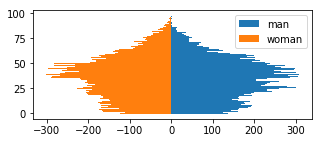

In [77]:
plt.figure(figsize=(5,2))
m = plt.barh(np.arange(len(city_man)), city_man, label='man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label='woman')
m = plt.legend()

In [87]:
df = pd.read_csv('korea.csv', encoding='cp949')
df = df.replace(',','',regex=True)
df.shape

data = np.array(df)
area = data[:,0]

In [88]:
city = '서울' # 이 글자가 들어간 행은 전부 찾자, 조건부 검색, 마스크(True만 뽑기)
is_contain = []
for i in range(len(area)):
    is_contain.append(city in area[i])

np.mean(is_contain)
city_data = data[is_contain]
city_data.shape

(450, 207)

In [99]:
city_man = city_data[:,man_0_index:man_0_index+max_age].astype(np.int)
city_woman = city_data[:,woman_0_index:woman_0_index+max_age].astype(np.int)
city_man.shape, city_woman.shape

((450, 99), (450, 99))

In [100]:
city_man = np.sum(city_man, axis=0)
city_woman = np.sum(city_woman, axis=0)

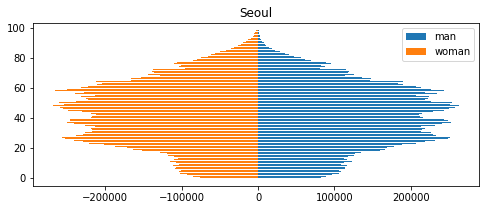

In [101]:
plt.figure(figsize=(8,3))
plt.title('Seoul')
m = plt.barh(np.arange(len(city_man)), city_man, label='man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label='woman')
m = plt.legend()

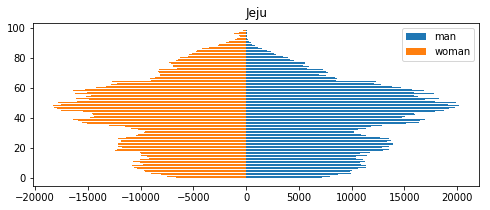

In [102]:
df = pd.read_csv('korea.csv', encoding='cp949')
df = df.replace(',','',regex=True)
df.shape

data = np.array(df)
area = data[:,0]

city = '제주' # 이 글자가 들어간 행은 전부 찾자, 조건부 검색, 마스크(True만 뽑기)
is_contain = []
for i in range(len(area)):
    is_contain.append(city in area[i])

np.mean(is_contain)
city_data = data[is_contain]
city_data.shape

city_man = city_data[:,man_0_index:man_0_index+max_age].astype(np.int)
city_woman = city_data[:,woman_0_index:woman_0_index+max_age].astype(np.int)
city_man.shape, city_woman.shape


city_man = np.sum(city_man, axis=0)
city_woman = np.sum(city_woman, axis=0)

plt.figure(figsize=(8,3))
plt.title('Jeju')
m = plt.barh(np.arange(len(city_man)), city_man, label='man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label='woman')
m = plt.legend()

In [104]:
city_man.shape, city_woman.shape

((99,), (99,))

In [106]:
np.sum(city_data[:,man_0_index:man_0_index+max_age].astype(np.int))

1010031

In [107]:
np.sum(city_man)

1010031

In [108]:
np.sum(city_woman)

996948

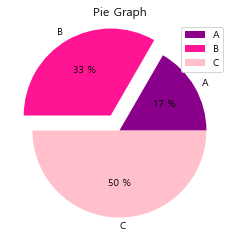

In [125]:
# p130, p134 파이 돌출 효과
plt.rc('font',family='Malgun Gothic')
color = ['darkmagenta', 'deeppink', 'pink']
plt.title('Pie Graph')
plt.pie([10,20,30], labels=['A','B','C'],autopct='%.0f %%'
        , colors=color, explode=(0,0.2,0))
plt.legend()
plt.show()

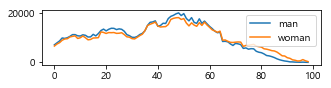

In [131]:
plt.figure(figsize=(5,1))
p = plt.plot(city_man, label='man')
p = plt.plot(city_woman, label='woman')
plt.legend()

<BarContainer object of 99 artists>

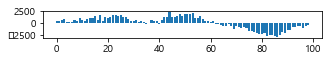

In [133]:
# p144 남녀 인구의 차이
plt.figure(figsize=(5,0.5))
plt.bar(np.arange(len(city_man)), city_man - city_woman)

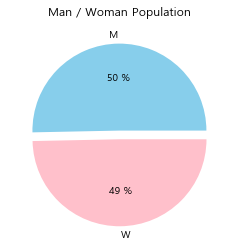

In [128]:
plt.title('Man / Woman Population')
colors = ['skyblue','pink']

n = plt.pie([np.sum(city_man),np.sum(city_woman)], labels=['M','W'], autopct='%d %%', colors=colors, explode=(0,0.1))

- plot(x) plot(x, y) 선
- hist(x) 히스토그램
- boxplot(x) 박스 : 분포
- bar(x, y) barh(x, y) 막대그래프
- pie(x)
- scatter(x, y) 산점도

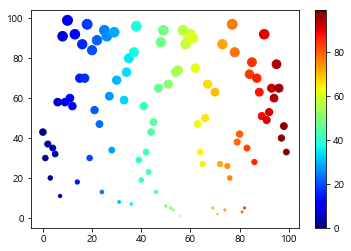

In [138]:
# p144 산점도(scatter) 산개할 산, 점 점, 그림 도
# p146 s(size), c(color)
color = ['red','green','black','gold']
color = 'blue'
y = np.random.randint(0,100,size=100)
n = plt.scatter(np.arange(len(y)),y,
               s=y,c=range(len(y)), cmap='jet')
n = plt.colorbar()